In [85]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [86]:
data = pd.read_csv(r'D:\\TRANSFER EVERYONE\\LOP@\\ToyotaCorolla.csv')


In [87]:
data.head()

,Price,Age_08_04,KM,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,1,0,2000,3,210,1165
1,13750,23,72937,1,0,2000,3,210,1165
2,13950,24,41711,1,0,2000,3,210,1165
3,14950,26,48000,0,0,2000,3,210,1165
4,13750,30,38500,0,0,2000,3,210,1170


In [88]:
#data["Species"].value_counts()

In [89]:
#cleanup_nums = {"Species": {"Perch": 1, "Bream": 2, "Roach": 3, "Pike": 4,"Smelt": 5, "Parkki": 6, "Whitefish":7 }}
#data = data.replace(cleanup_nums)
data.head()

,Price,Age_08_04,KM,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,1,0,2000,3,210,1165
1,13750,23,72937,1,0,2000,3,210,1165
2,13950,24,41711,1,0,2000,3,210,1165
3,14950,26,48000,0,0,2000,3,210,1165
4,13750,30,38500,0,0,2000,3,210,1170


In [90]:
X = data.drop(labels=['Price'], axis = 1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
X_train.shape, X_test.shape  

((1148, 8), (288, 8))

In [91]:

X_train=preprocessing.scale(X_train)
X_train=pd.DataFrame(X_train)
X_train.head()


,0,1,2,3,4,5,6,7
0,0.585577,2.818689,-1.470556,-0.236892,2.313042,-0.054889,2.366658,0.510562
1,-0.272696,-0.411118,0.680015,-0.236892,0.186873,0.995316,-0.056830,0.138903
2,0.210082,-0.183190,0.680015,-0.236892,-1.407753,-1.105093,-0.444587,-1.068991
3,0.531935,-0.480329,-1.470556,-0.236892,-1.407753,-1.105093,-1.656331,7.572094
4,-0.916400,-0.780421,0.680015,-0.236892,-0.886842,-1.105093,-0.444587,-0.883161


In [105]:
X_train=np.array(X_train)
X_train.shape
Z = np.ones((len(X_train[:, 0]), len(X_train[0]) + 1))
Z[:,:-1] = X_train
X_train = Z

y_train=np.array(y_train)


In [106]:
X_train.shape, X_test.shape 

((1148, 9), (288, 8))

In [107]:
def stepGradient(x_train, y_train,alpha,m):
    m_slopes = np.zeros(len(m))
    N = x_train.shape[0]
    M = x_train.shape[1]
    
    #print(x_train[0])
    for i in range(N):
        for j in range(M):
            m_slopes[j] += (-2/N)*(y_train[i] - (m*x_train[i]).sum())*x_train[i][j]
    m = m - alpha*m_slopes
    return m

In [108]:
def gradientDescent(X, Y, learningRate, n):
    m = np.zeros(len(X[0]))
    cst = []
    itr = []
    for i in range(n):
        m = stepGradient(X, Y, learningRate, m)
        c = cost(X, Y, m)
        cst.append(c)
        itr.append(i + 1)
        print("Cost ", i + 1, ":", c)
        
    return m, cst, itr

In [109]:
def cost(X, Y, m):
    totalCost = 0
    N = len(X[:, 0])
    for i in range(N):
        totalCost += (Y[i] - (m*X[i]).sum())**2
        
    return totalCost/N

In [110]:
def predict(X, m):
    N = len(X[:, 0])
    print(N)
    Y = np.zeros(N)
    for i in range(N):
        Y[i] = (X[i] * m).sum()
        
    return Y

In [98]:


n = 200
learningRate = 0.1666
m, cst, itr = gradientDescent(X_scaled, y_train, learningRate, n)
print(m)

Cost  1 : 55059173.82009301
Cost  2 : 25221408.59822907
Cost  3 : 12251397.678029956
Cost  4 : 6527928.330357063
Cost  5 : 3983428.9478541915
Cost  6 : 2845700.354116263
Cost  7 : 2333470.7067778907
Cost  8 : 2100392.8740036967
Cost  9 : 1992453.414462451
Cost  10 : 1941000.9784894388
Cost  11 : 1915345.6614343186
Cost  12 : 1901705.8120602744
Cost  13 : 1893845.0051372035
Cost  14 : 1888903.753745735
Cost  15 : 1885541.5605674027
Cost  16 : 1883107.1720580705
Cost  17 : 1881266.7992608696
Cost  18 : 1879836.5771688987
Cost  19 : 1878706.3049212703
Cost  20 : 1877804.1369114304
Cost  21 : 1877079.767638204
Cost  22 : 1876496.0649297147
Cost  23 : 1876024.638395687
Cost  24 : 1875643.2998697418
Cost  25 : 1875334.4785124229
Cost  26 : 1875084.1509461366
Cost  27 : 1874881.0727713706
Cost  28 : 1874716.2019865734
Cost  29 : 1874582.2540813896
Cost  30 : 1874473.3527970035
Cost  31 : 1874384.7531709545
Cost  32 : 1874312.6205734583
Cost  33 : 1874253.8537731313
Cost  34 : 1874205.94293633

In [111]:
X_scaled.shape, X_test.shape 

((1148, 9), (288, 8))

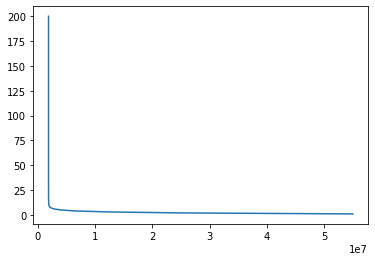

In [112]:
plt.plot(cst, itr)
plt.show()

1148
(1148,)
(1148,)


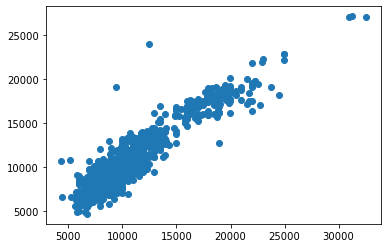

In [113]:
Y_pred = predict(X_scaled, m)
print(Y_pred.shape)
print(y_train.shape)
plt.scatter(y_train, Y_pred)
plt.show()

In [114]:
X_scaled.shape, X_test.shape 

((1148, 9), (288, 8))

In [115]:
X_test=preprocessing.scale(X_test)
X_test=pd.DataFrame(X_test)
X_test.head()




,0,1,2,3,4,5,6,7
0,0.685060,1.291467,0.751809,-0.265767,-0.028501,-1.009588,-0.030518,-0.361422
1,-0.185049,0.866485,0.751809,-0.265767,-0.028501,-1.009588,-0.030518,-0.361422
2,-0.728868,-1.014007,-1.330124,-0.265767,-0.028501,-1.009588,-0.030518,-0.361422
3,1.228879,0.107170,-1.330124,-0.265767,-0.028501,-1.009588,-0.425535,-0.466499
4,0.032478,-0.120461,-1.330124,-0.265767,-0.028501,-1.009588,-0.425535,-0.466499


In [116]:
X_scaled.shape, X_test.shape 

((1148, 9), (288, 8))

In [117]:
X_test=np.array(X_test)
X_test.shape
Z = np.ones((len(X_test[:, 0]), len(X_test[0]) + 1))
Z[:,:-1] = X_test
X_scaled1 = Z



In [121]:
X_scaled.shape

(1148, 9)

In [122]:
X_scaled1.shape

(288, 9)

In [123]:
y_test=np.array(y_test)

In [125]:
Y_pred_test = predict(X_scaled1, m)



288


In [127]:
print(Y_pred_test)

[ 7723.87069782 10039.76504708 12785.24722695  7316.36842868
 10200.25951767  9424.76303337  6818.18705012 16324.77822892
 11024.05747894 10195.06066389  7487.54916368 10958.62318041
 11572.44478298  9536.5454711   6925.83166557 16192.91836714
 10888.80941834  7386.58292824 12630.22373475  8617.15811817
  6357.15850907  5632.19089499 11499.37444973 11864.29289453
 19282.94102005  7445.03364801 14036.65489825  6298.14883231
  8864.94567699  7687.57265543 11773.53796753  7637.48813744
 16818.83074701  6698.8321276  11978.5585643  12857.81651284
 10881.70658219 12008.24395792  9683.90042148  8859.91161737
  8670.08295193 10321.13591713  9024.14248484 17203.16691318
 10744.44589072  6853.80643516  9394.93564469  7414.25293539
  8408.94005739  8381.8628864  19529.80813859  7919.37460555
  6731.44488323  6169.26887115 11381.20172251 18378.90834577
 13454.42708706  9740.28506215 19679.27475492 10804.72227957
  5789.15292237  7409.32261542 10794.40749118 11846.46208979
 10512.78003456 13912.05

In [129]:
print(y_test)

[ 7950 10950 14950  7500  9900  8900  6950 15750 11950  9930  8500 10450
 11895  9950  6450 15500 11950  6900 10950  9750  7350  8950 13750 14950
 19950  9450 11500  8500  9450  8800 11450 10500 13750  8250 10950 11950
  8950 12900  9500  9950  8950  9500  9950 15500 10950  7500  9450  9500
 10845  8500 19750  8950  7250  6750 10950 19950 11000  8950 17795 10500
  5740  7750 10950 10500 12500 12900  8450  7950 19450 11450  9500  4450
 11690  7900 14750 14990  9950  7450  6950  8250  6750  6900  5950 12750
 11950 10750  8950 11950  8250  7450  6950 10750 17450  9940  7950 12250
 12950 10950 12450  6900  8500 10750  9700  9250  7900 19000 18450  8500
 13250 10400 12500  9200  8500  8250 13750  8950  7950 10950  9900  7750
 20500  9950 13995 10250  7950 23950  7950 11500  9250  9950 17950  8950
  9980 10500 21125 11950 11950 12450  7995 13500 15750  8850  8750  7750
  9895 20750 11950 13950 10950 11950  7950 12950  9950  8950 11450 16950
  9900  8950  8450  8750  7400  8500  7800 16750  9